# PRCP-1000-ProtugeseBank - Portugese Bank Marketing Project
    
    By: PTID-CDS-JAN22-1266
        Guiller Fiestada      
                              

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   ### Input variables:
   ##### bank client data:
   1 - age (numeric)<br>
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") <br>
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "unknown","secondary","primary","tertiary")<br>
   5 - default: has credit in default? (binary: "yes","no")<br>
   6 - balance: average yearly balance, in euros (numeric) <br>
   7 - housing: has housing loan? (binary: "yes","no")<br>
   8 - loan: has personal loan? (binary: "yes","no")
   ##### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
  10 - day: last contact day of the month (numeric)<br>
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  12 - duration: last contact duration, in seconds (numeric)
   ##### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
  15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>
   #### social and economic context attributes
  17 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
  18 - cons.price.idx: consumer price index - monthly indicator (numeric)   
  19 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)    
  20 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
  21 - nr.employed: number of employees - quarterly indicator (numeric)

  ### Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")<br><br>

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

#### Description
* The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. <br>
* The classification goal is to predict if the client will subscribe to a term deposit (variable y).

# 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data visualization
import numpy as np
from numpy import asarray
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns

#model validation
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score , f1_score 
from sklearn.metrics import log_loss,roc_auc_score,roc_curve,auc

# 2. Loading Dataset 

In [2]:
bank_full = pd.read_csv('bank-full.csv',sep=';')
bank = pd.read_csv('bank.csv',sep=';')
bank_add= pd.read_csv('bank-additional/bank-additional.csv',sep=';')
bank_add_full= pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')

# 3. EDA

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

display(bank_full.head())
display(bank.head())
display(bank_add.head())
display(bank_add_full.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print('the shape of bank dataset is: ', bank.shape)
print('the shape of bank-full dataset is: ', bank_full.shape)
print('the shape of bank additional dataset is: ', bank_add.shape)
print('the shape of bank additional-full dataset is: ', bank_add_full.shape)

the shape of bank dataset is:  (4521, 17)
the shape of bank-full dataset is:  (45211, 17)
the shape of bank additional dataset is:  (4119, 21)
the shape of bank additional-full dataset is:  (41188, 21)


* based on the information ; bank and bank additional is the 10% data of bank-full and bank-additional-full dataset 
* therefore, safe to say that these are the train and test data


In [5]:
# checking the information
bank.info(), bank_full.info(), bank_add.info(), bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 

(None, None, None, None)

In [6]:
#checking the missing values

bank.isnull().sum(), bank_full.isnull().sum(), bank_add.isnull().sum(), bank_add_full.isnull().sum()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y    

***Dividing Columns into Numeric Columns and Object Columns***

In [7]:
# Bank-full dataset
obj_columns = []
int_columns = []
for i, x in enumerate(bank_full.dtypes.tolist()):
    if x == 'object':
        obj_columns.append(bank_full.columns[i])
    elif x == 'int64':
        int_columns.append(bank_full.columns[i])

In [8]:
for x in obj_columns:
    print(f'Number of Unique Values in {x} column: ', bank_full[x].nunique())

Number of Unique Values in job column:  12
Number of Unique Values in marital column:  3
Number of Unique Values in education column:  4
Number of Unique Values in default column:  2
Number of Unique Values in housing column:  2
Number of Unique Values in loan column:  2
Number of Unique Values in contact column:  3
Number of Unique Values in month column:  12
Number of Unique Values in poutcome column:  4
Number of Unique Values in y column:  2


**Encoding Plan** <br>
* **One Hot Encoding** : 'job, marital, contact, poutcome' <br>
* **Binary Encoding** : 'loan, housing, default' <br>
* **Label Encoding**: 'y' (output) <br>
* **Ordinal Encoding**: 'education' <br>
* **Sin/Cosine Encoding**: 'month' <br>

### Data Visualization

In [9]:
def graph(name, u):
    bank_full[name].value_counts().plot(kind="bar",ax=u, color=colors)
    
    plt.setp(u.get_xticklabels(), rotation=90)
    u.set_title(name, fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+100),
                   ha="center", va='center', fontsize=8, fontweight="bold")

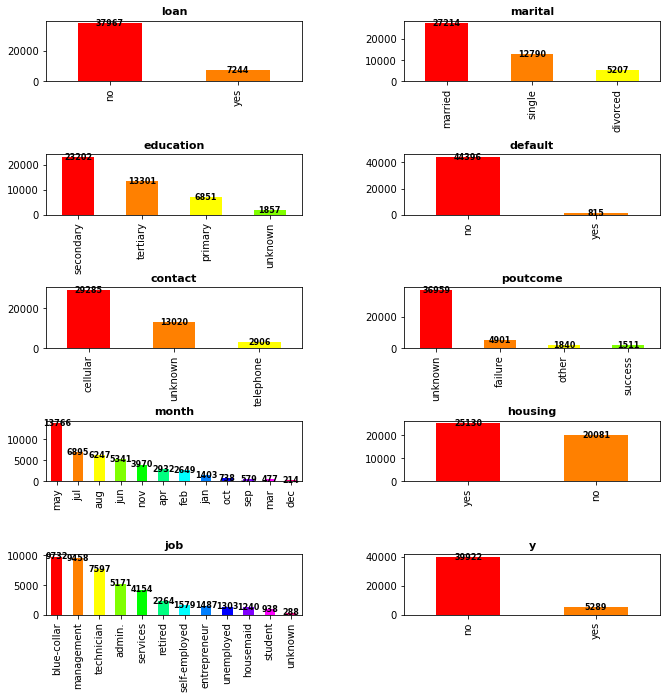

In [10]:
# Checking the distribution of object datatypes

fig2, ax2 = plt.subplots(5,2, figsize=(11, 10), gridspec_kw={"wspace" : 0.4, "hspace" : 1.2, "top": 0.95})

colors=["#ff0000","#ff8000","#ffff00","#80ff00","#00ff00", "#00ff80", "#00ffff", "#0080ff", "#0000ff", "#8000ff", "#ff00ff", "#ff0080"]

graph("loan",ax2[0,0])
graph("marital",ax2[0,1])
graph("education",ax2[1,0])
graph("default",ax2[1,1])
graph("contact",ax2[2,0])
graph("poutcome",ax2[2,1])
graph("month",ax2[3,0])
graph("housing",ax2[3,1])
graph("job",ax2[4,0])
graph("y",ax2[4,1])
plt.rcParams['axes.axisbelow'] = True

y
no     39922
yes     5289
dtype: int64


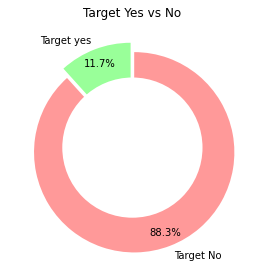

In [11]:
# Checking the percentage of distribution of target y

print(bank_full.groupby('y').size())
total_customer = len(bank_full)

labels = ['Target yes', 'Target No']
pic_sizes = [round((len(bank_full[bank_full['y'] == 'yes'])/total_customer)*100, 2), 100-round((len(bank_full[bank_full['y'] == 'yes'])/total_customer)*100, 2)]
pic_colors = ['#99ff99','#ff9999']
explode = (0.05,0.05)

plt.title('Target Yes vs No')
plt.pie(pic_sizes, colors = pic_colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()


From the chart above, the success to failure response ratio is 1:8

marital
divorced     5207
married     27214
single      12790
dtype: int64


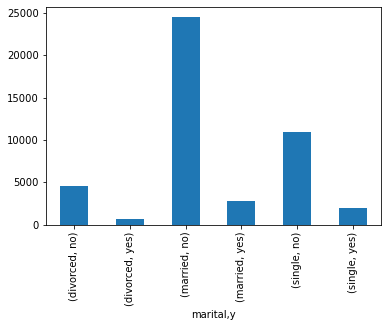

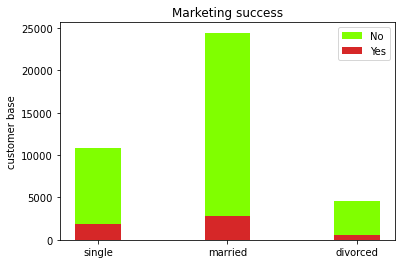

In [12]:
# Checking the response rate per marital status

print(bank_full.groupby('marital').size())
bank_full.groupby(['marital', 'y']).size().plot(kind='bar')


labels = ['single', 'married', 'divorced']
marital_yes = [len(bank_full[(bank_full['marital'] == 'single') & (bank_full['y'] == 'yes')]), 
               len(bank_full[(bank_full['marital'] == 'married') & (bank_full['y'] == 'yes')]),
               len(bank_full[(bank_full['marital'] == 'divorced') & (bank_full['y'] == 'yes')])]
marital_no = [len(bank_full[(bank_full['marital'] == 'single') & (bank_full['y'] == 'no')]), 
              len(bank_full[(bank_full['marital'] == 'married') & (bank_full['y'] == 'no')]), 
              len(bank_full[(bank_full['marital'] == 'divorced') & (bank_full['y'] == 'no')])]
width = 0.35

fig, ax = plt.subplots()
ax.bar(labels, marital_no, width, label='No', color="#80ff00")
ax.bar(labels, marital_yes, width,  label='Yes', color='C3')

ax.set_ylabel('customer base')
ax.set_title('Marketing success')
ax.legend()

plt.show()

Based on the graph above, it shows the customer with "single" relationship type have best positive response rate

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64


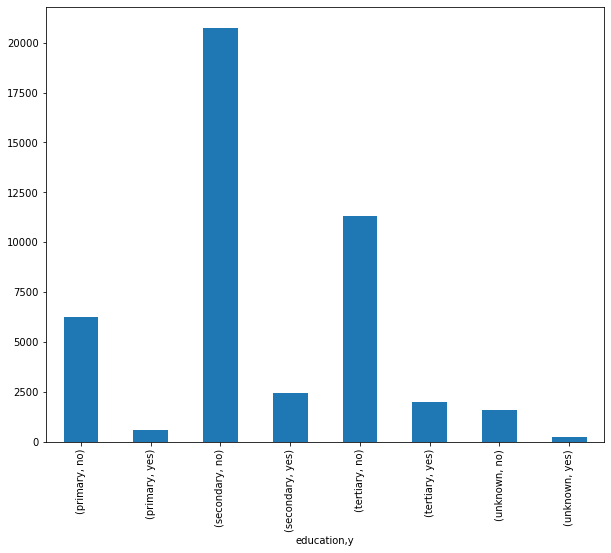

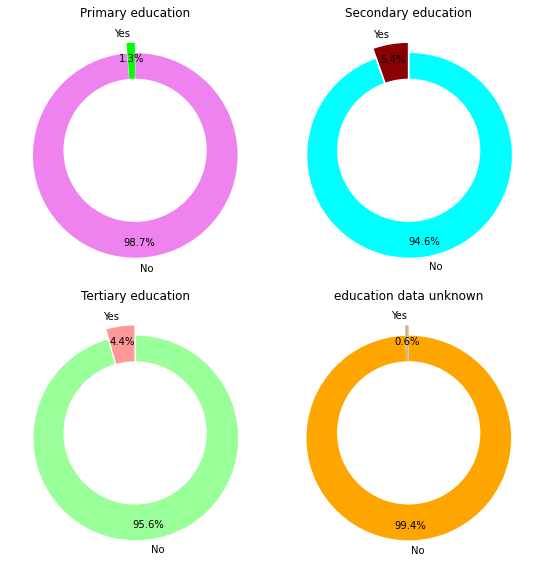

In [13]:
# Checking the response rate by eductaion

print(bank_full.groupby('education').size())
plt.figure(figsize=(10, 8))
bank_full.groupby(['education', 'y']).size().plot(kind='bar')


labels = ['Yes', 'No']
primary_sizes = [round((len(bank_full[(bank_full['education'] == 'primary') & (bank_full['y'] == 'yes')])/total_customer)*100, 2), 
                    100-round((len(bank_full[(bank_full['education'] == 'primary') & (bank_full['y'] == 'yes')])/total_customer)*100, 2)]
secondary_sizes = [round((len(bank_full[(bank_full['education'] == 'secondary') & (bank_full['y'] == 'yes')])/total_customer)*100, 2), 
                    100-round((len(bank_full[(bank_full['education'] == 'secondary') & (bank_full['y'] == 'yes')])/total_customer)*100, 2)]
tertiary_sizes = [round((len(bank_full[(bank_full['education'] == 'tertiary') & (bank_full['y'] == 'yes')])/total_customer)*100, 2), 
                    100-round((len(bank_full[(bank_full['education'] == 'tertiary') & (bank_full['y'] == 'yes')])/total_customer)*100, 2)]
unknown_sizes = [round((len(bank_full[(bank_full['education'] == 'unknown') & (bank_full['y'] == 'yes')])/total_customer)*100, 2), 
                    100-round((len(bank_full[(bank_full['education'] == 'unknown') & (bank_full['y'] == 'yes')])/total_customer)*100, 2)]
primary_colors = ['lime', 'violet']
secondary_colors = ['darkred','aqua']
tertiary_colors = ['#ff9999','#99ff99']
unknown_colors = ['tan', 'orange']
explode = (0.05,0.05)

fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title('Primary education')
plt.pie(primary_sizes, colors = primary_colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.subplot(2, 2, 2)
plt.title('Secondary education')
plt.pie(secondary_sizes, colors = secondary_colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.subplot(2, 2, 3)
plt.title('Tertiary education')
plt.pie(tertiary_sizes, colors = tertiary_colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.subplot(2, 2, 4)
plt.title('education data unknown')
plt.pie(unknown_sizes, colors = unknown_colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

In [38]:
jobs = bank_full['job'].unique().tolist()

In [15]:
labels1 = []
for x in jobs:
    labels1.append(x + '\n' + str(round(len(bank_full[(bank_full['job'] == x) & 
                                                  (bank_full['y'] == 'yes')]) / len(bank_full[bank_full['job'] == x]) * 100, 2)) + '%')

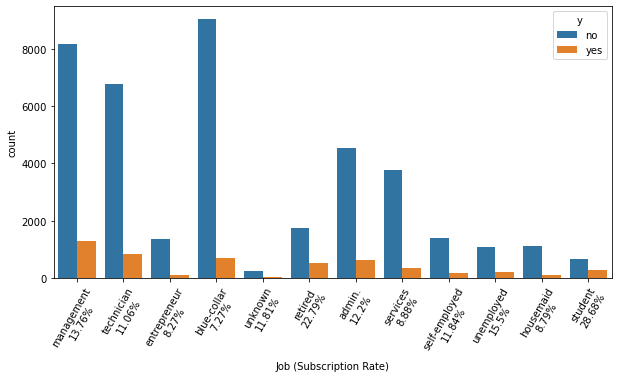

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x = bank_full['job'], hue=bank_full['y'])
locs, label = plt.xticks()
new_xticks = labels1
_ = plt.xticks(locs, new_xticks, rotation=60) 
_ = plt.xlabel('Job (Subscription Rate)')

### Data Preproccessing

In [17]:
# Splitting the data into test and train
X = bank_full.drop(['y'], axis=1)
y = bank_full['y']

In [18]:
# Following the encoding plan of object category mentioned above
# One Hot Encoding : 'job, marital, contact, poutcome'
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

ohe_list = ['job', 'marital', 'contact', 'poutcome']


In [19]:
for a in ohe_list:
    if a == 'contact':
        d = pd.get_dummies(X[a], prefix='ct')
        X = pd.concat([X,d], axis=1)
        del X[a]
    elif a == 'poutcome':
        d = pd.get_dummies(X[a], prefix='pc')
        X = pd.concat([X,d], axis=1)
        del X[a]
    else:
        d = pd.get_dummies(X[a], drop_first=True)
        X = pd.concat([X,d], axis=1)
        del X[a]
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,58,tertiary,no,2143,yes,no,5,may,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,secondary,no,29,yes,no,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,33,secondary,no,2,yes,yes,5,may,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,unknown,no,1506,yes,no,5,may,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,33,unknown,no,1,no,no,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [20]:
X.shape

(45211, 32)

In [21]:
#Binary Encoding : 'loan, housing, default'
bin_encoder = preprocessing.LabelBinarizer()
bin_list = ['loan', 'housing', 'default']
for l in bin_list:
    a = bin_encoder.fit_transform(X[l])
    X[l] = a

X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,58,tertiary,0,2143,1,0,5,may,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,secondary,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,33,secondary,0,2,1,1,5,may,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,unknown,0,1506,1,0,5,may,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,33,unknown,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [22]:
#Ordinal Encoding: 'education'

from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
a = ord_encoder.fit_transform(asarray(X['education']).reshape(-1,1))
a = a.reshape(45211,)
X['education'] = a
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,58,2.0,0,2143,1,0,5,may,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,1.0,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,33,1.0,0,2,1,1,5,may,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,3.0,0,1506,1,0,5,may,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,33,3.0,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [23]:
#Sin/Cosine Encoding: 'month' 
import math
X['month'] = X['month'].map({'jan':1,
               'feb':2,
               'mar':3,
               'apr':4,
               'may':5,
               'jun':6,
               'jul':7,
               'aug':8,
               'sep':9,
               'oct':10,
               'nov':11,
               'dec':12})
X['month'] = X['month'].apply(lambda x: math.sin(2*math.pi*x/12))
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,58,2.0,0,2143,1,0,5,0.5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,1.0,0,29,1,0,5,0.5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,33,1.0,0,2,1,1,5,0.5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,3.0,0,1506,1,0,5,0.5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,33,3.0,0,1,0,0,5,0.5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [24]:
#Standardize the int value using Standard Scalar

from sklearn.preprocessing import StandardScaler

scaler_col = ['age', 'balance', 'duration', 'day']

for l in scaler_col:
    sc = StandardScaler()
    scaled_X = sc.fit_transform(asarray(X[l]).reshape(-1,1))
    X[l] = scaled_X.reshape(45211,)
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,1.606965,2.0,0,0.256419,1,0,-1.298476,0.5,0.011016,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0.288529,1.0,0,-0.437895,1,0,-1.298476,0.5,-0.416127,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,-0.747384,1.0,0,-0.446762,1,1,-1.298476,0.5,-0.707361,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0.571051,3.0,0,0.047205,1,0,-1.298476,0.5,-0.645231,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,-0.747384,3.0,0,-0.447091,0,0,-1.298476,0.5,-0.233620,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [25]:
# Label Encoding: 'y' (output)

from sklearn.preprocessing import LabelEncoder

la_encoder = preprocessing.LabelEncoder()
a = la_encoder.fit_transform(y)
y = a
y

array([0, 0, 0, ..., 1, 0, 0])

<AxesSubplot:>

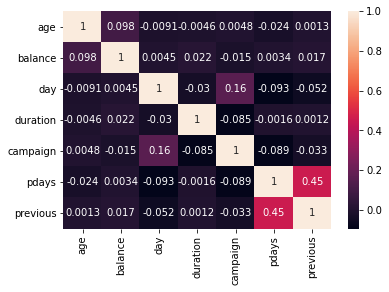

In [89]:
#Checking the correlation

sns.heatmap(bank_full.corr(), annot=True)     

# 4. Train Test Split

In [26]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# 5. Building a Model

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

LR_model = LogisticRegression() 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(LR_model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
LR = search.fit(X_train, y_train)

In [29]:
LR.best_params_

{'C': 0.07849615962762649, 'penalty': 'l2', 'solver': 'newton-cg'}

In [92]:
# Scores
LR_pred = LR.predict(X_test)

lr_acc = accuracy_score(y_test , LR_pred)
lr_prec = precision_score(y_test , LR_pred)
lr_rec = recall_score(y_test , LR_pred)
lr_fscore = f1_score(y_test , LR_pred)
lr_roc = roc_auc_score(y_test , LR_pred)
lr_logloss = log_loss(y_test , LR_pred)

print('Accuracy: ', lr_acc)
print("Precision: ", lr_prec)
print("Recall:" , lr_rec)
print('F1 score: ', lr_fscore) 
print('ROC : ', lr_roc) 
print('Log_Loss : ', lr_logloss)

pd.crosstab(y_test, LR_pred)

Accuracy:  0.8979916836238166
Precision:  0.6467889908256881
Recall: 0.31449814126394054
F1 score:  0.4232116058029015
ROC :  0.6456503560306447
Log_Loss :  3.5232587711526495


col_0,0,1
row_0,,
0,9727,231
1,922,423


### Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

GNB_model = GaussianNB() 

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=GNB_model, 
                 param_grid=params_NB, 
                 cv=3,   
                 verbose=1, 
                 scoring='accuracy') 

gs_NB.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [32]:
gs_NB.best_params_

{'var_smoothing': 0.23101297000831597}

In [93]:
# Scores

GNB_pred = gs_NB.predict(X_test)

gnb_acc = accuracy_score(y_test , GNB_pred)
gnb_prec = precision_score(y_test , GNB_pred)
gnb_rec = recall_score(y_test , GNB_pred)
gnb_fscore = f1_score(y_test , GNB_pred)
gnb_roc = roc_auc_score(y_test , GNB_pred)
gnb_logloss = log_loss(y_test , GNB_pred)

print('Accuracy: ', gnb_acc)
print("Precision: ", gnb_prec)
print("Recall:" , gnb_rec)
print('F1 score: ', gnb_fscore) 
print('ROC : ', gnb_roc) 
print('Log_Loss : ', gnb_logloss)

pd.crosstab(y_test, GNB_pred)

Accuracy:  0.8809165708219057
Precision:  0.4931506849315068
Recall: 0.026765799256505577
F1 score:  0.050775740479548664
ROC :  0.5115250968566118
Log_Loss :  4.11299855017736


col_0,0,1
row_0,,
0,9921,37
1,1309,36


### SVC

In [34]:
from sklearn.svm import SVC

kernel = ['linear', 'rbf', 'poly']
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
degree = [0, 1, 2, 3]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'degree' : degree}

svm = SVC()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='accuracy', cv=2, return_train_score=True, n_jobs=-1, n_iter=20, verbose=1)
svc = svm_search.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


In [35]:
svc.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 1}

In [94]:
# Scores

svc_pred = svc.predict(X_test)

svc_acc = accuracy_score(y_test , svc_pred)
svc_prec = precision_score(y_test , svc_pred)
svc_rec = recall_score(y_test , svc_pred)
svc_fscore = f1_score(y_test , svc_pred)
svc_roc = roc_auc_score(y_test , svc_pred)
svc_logloss = log_loss(y_test , svc_pred)

print('Accuracy: ', svc_acc)
print("Precision: ", svc_prec)
print("Recall:" , svc_rec)
print('F1 score: ', svc_fscore) 
print('ROC : ', svc_roc) 
print('Log_Loss : ', svc_logloss)

pd.crosstab(y_test, svc_pred)

Accuracy:  0.894718216402725
Precision:  0.7044854881266491
Recall: 0.19851301115241635
F1 score:  0.30974477958236657
ROC :  0.5936328863755654
Log_Loss :  3.636311905233646


col_0,0,1
row_0,,
0,9846,112
1,1078,267


### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

params = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

knn_model = KNeighborsClassifier()
knn_search = GridSearchCV (estimator=knn_model, param_grid=params, cv=kfold, scoring='r2')

knn = knn_search.fit(X_train, y_train)

In [50]:
knn.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [95]:
# Scores

knn_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test , knn_pred)
knn_prec = precision_score(y_test , knn_pred)
knn_rec = recall_score(y_test , knn_pred)
knn_fscore = f1_score(y_test , knn_pred)
knn_roc = roc_auc_score(y_test , knn_pred)
knn_logloss = log_loss(y_test , knn_pred)

print('Accuracy: ', knn_acc)
print("Precision: ", knn_prec)
print("Recall:" , knn_rec)
print('F1 score: ', knn_fscore) 
print('ROC : ', knn_roc) 
print('Log_Loss : ', knn_logloss)

pd.crosstab(y_test, knn_pred)

Accuracy:  0.8902946120498982
Precision:  0.6023391812865497
Recall: 0.22973977695167286
F1 score:  0.33261571582346605
ROC :  0.6046268677889515
Log_Loss :  3.7891042951043983


col_0,0,1
row_0,,
0,9754,204
1,1036,309


### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_model = DecisionTreeClassifier(random_state=42)
dt_search = GridSearchCV(estimator=dt_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

dt= dt_search.fit(X_train, y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [55]:
dt.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}

In [96]:
# Scores

dt_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test , dt_pred)
dt_prec = precision_score(y_test , dt_pred)
dt_rec = recall_score(y_test , dt_pred)
dt_fscore = f1_score(y_test , dt_pred)
dt_roc = roc_auc_score(y_test , dt_pred)
dt_logloss = log_loss(y_test , dt_pred)

print('Accuracy: ', dt_acc)
print("Precision: ", dt_prec)
print("Recall:" , dt_rec)
print('F1 score: ', dt_fscore) 
print('ROC : ', dt_roc) 
print('Log_Loss : ', dt_logloss)

pd.crosstab(y_test, dt_pred)

Accuracy:  0.8992302928426081
Precision:  0.636968085106383
Recall: 0.35613382899628254
F1 score:  0.45684310920362425
ROC :  0.6643593426965747
Log_Loss :  3.480481695470381


col_0,0,1
row_0,,
0,9685,273
1,866,479


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_model = RandomForestClassifier()
rf_search = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -1)

rf = rf_search.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


In [60]:
rf.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [97]:
# Scores

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test , rf_pred)
rf_prec = precision_score(y_test , rf_pred)
rf_rec = recall_score(y_test , rf_pred)
rf_fscore = f1_score(y_test , rf_pred)
rf_roc = roc_auc_score(y_test , rf_pred)
rf_logloss = log_loss(y_test , rf_pred)

print('Accuracy: ', rf_acc)
print("Precision: ", rf_prec)
print("Recall:" , rf_rec)
print('F1 score: ', rf_fscore) 
print('ROC : ', rf_roc) 
print('Log_Loss : ', rf_logloss)

pd.crosstab(y_test, rf_pred)

Accuracy:  0.9018844554543042
Precision:  0.6505102040816326
Recall: 0.379182156133829
F1 score:  0.47909816815406286
ROC :  0.675833295379628
Log_Loss :  3.388810237251334


col_0,0,1
row_0,,
0,9684,274
1,835,510


### XGBOOST

In [66]:
from xgboost import XGBClassifier

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

params_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

xgb_model = XGBClassifier()
xgb_search = RandomizedSearchCV(estimator=xgb_model,
            param_distributions=params_grid,
            cv=2, n_iter=50,
            scoring = 'accuracy',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

xgb = xgb_search.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[16:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
xgb.best_params_

{'n_estimators': 1500,
 'min_child_weight': 3,
 'max_depth': 2,
 'learning_rate': 0.15,
 'booster': 'gbtree',
 'base_score': 0.25}

In [98]:
# Scores

xgb_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test , xgb_pred)
xgb_prec = precision_score(y_test , xgb_pred)
xgb_rec = recall_score(y_test , xgb_pred)
xgb_fscore = f1_score(y_test , xgb_pred)
xgb_roc = roc_auc_score(y_test , xgb_pred)
xgb_logloss = log_loss(y_test , xgb_pred)

print('Accuracy: ', xgb_acc)
print("Precision: ", xgb_prec)
print("Recall:" , xgb_rec)
print('F1 score: ', xgb_fscore) 
print('ROC : ', xgb_roc) 
print('Log_Loss : ', xgb_logloss)

pd.crosstab(y_test, xgb_pred)

Accuracy:  0.9042732018048306
Precision:  0.6443468715697036
Recall: 0.43643122676579926
F1 score:  0.5203900709219857
ROC :  0.7019472864096118
Log_Loss :  3.306309398289016


col_0,0,1
row_0,,
0,9634,324
1,758,587


# 6.  Model Evaluation

In [99]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression',
                                   'Gaussian NB',
                                   'Support Vector Classification',
                                   'K-Nearest Neighbor',
                                   'Decision Tree',
                                   'Random Forest Tree',
                                   'XGBoost'],
                         'Accuracy Score': [lr_acc,
                                           gnb_acc,
                                           svc_acc,
                                           knn_acc,
                                           dt_acc,
                                           rf_acc,
                                           xgb_acc],
                        'Precision': [lr_prec,
                                      gnb_prec,
                                      svc_prec,
                                      knn_prec,
                                      dt_prec,
                                      rf_prec,
                                      xgb_prec],
                         'Recall': [lr_rec,
                                      gnb_rec,
                                      svc_rec,
                                      knn_rec,
                                      dt_rec,
                                      rf_rec,
                                      xgb_rec],
                         'F1 Score': [lr_fscore,
                                      gnb_fscore,
                                      svc_fscore,
                                      knn_fscore,
                                      dt_fscore,
                                      rf_fscore,
                                      xgb_fscore],
                         'ROC': [lr_roc,
                                      gnb_roc,
                                      svc_roc,
                                      knn_roc,
                                      dt_roc,
                                      rf_roc,
                                      xgb_roc],
                         'Log_Loss': [lr_logloss,
                                      gnb_logloss,
                                      svc_logloss,
                                      knn_logloss,
                                      dt_logloss,
                                      rf_logloss,
                                      xgb_logloss]})
model_ev = model_ev.sort_values(by='Accuracy Score', ascending=False)
model_ev.style.background_gradient(cmap='Blues')

,Model,Accuracy Score,Precision,Recall,F1 Score,ROC,Log_Loss
6,XGBoost,0.904273,0.644347,0.436431,0.520390,0.701947,3.306309
5,Random Forest Tree,0.901884,0.650510,0.379182,0.479098,0.675833,3.388810
4,Decision Tree,0.899230,0.636968,0.356134,0.456843,0.664359,3.480482
0,Logistic Regression,0.897992,0.646789,0.314498,0.423212,0.645650,3.523259
2,Support Vector Classification,0.894718,0.704485,0.198513,0.309745,0.593633,3.636312
3,K-Nearest Neighbor,0.890295,0.602339,0.229740,0.332616,0.604627,3.789104
1,Gaussian NB,0.880917,0.493151,0.026766,0.050776,0.511525,4.112999


### ROC Curve of the Best Model

roc_auc_score is:  0.7019472864096118


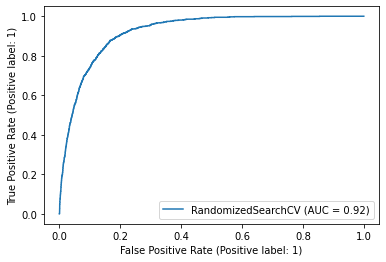

In [101]:
from sklearn import metrics

metrics.plot_roc_curve(xgb, X_test, y_test)
print('roc_auc_score is: ', roc_auc_score(y_test, xgb_pred))

### Feature Importance of the best Model

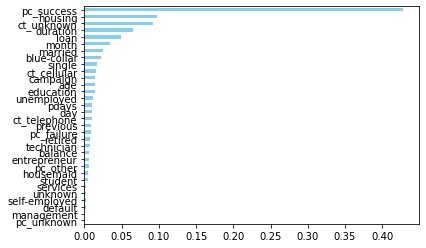

In [118]:
# Visualization for the most important features.
pd.DataFrame(xgb_search.best_estimator_.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=True).plot(kind='barh', 
                                                                                                            legend=None,
                                                                                                         color="skyblue");

In [116]:
pd.DataFrame(xgb_search.best_estimator_.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
pc_success,0.428385
housing,0.097688
ct_unknown,0.091942
duration,0.064696
loan,0.049134
month,0.033839
married,0.025304
blue-collar,0.022126
single,0.016791
ct_cellular,0.014979


# 7. Conclusion

#### XGBoost 
* Best model among other model we built for predicting the likeliness of the client to subscribe into a term deposit offered by Purtugese Bank with the accuracy score of 90.43% and roc_auc score of 70.19%

#### Top 5 Feature Importance
 1. poutcome - success
 2. housing
 3. contact - unknown
 4. duration
 5. loan